In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv')

In [4]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [5]:
dummies=pd.get_dummies(df[['Car Model']])

In [6]:
df_dummies=pd.concat([df,dummies],axis='columns')
df_dummies

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [7]:
df=df_dummies.drop(['Car Model','Car Model_Mercedez Benz C class'],axis=1)

In [8]:
df

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [9]:
x=df.drop(['Sell Price($)'],axis=1)

In [10]:
x

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [11]:
y=df['Sell Price($)']

In [12]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [13]:
import matplotlib.pyplot as plt

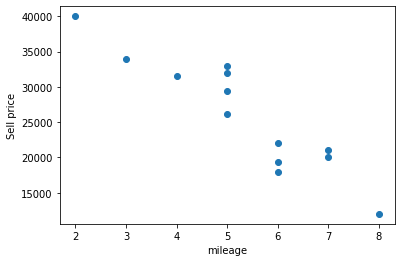

In [14]:
plt.xlabel('mileage')
plt.ylabel('Sell price')
plt.scatter(x['Age(yrs)'],y)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [20]:
x_train

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
12,59000,5,0,0
4,46000,4,0,1
5,59000,5,1,0
0,69000,6,0,1
11,79000,7,0,0
9,67000,6,0,0
8,91000,8,1,0
6,52000,5,1,0
3,22500,2,0,1


In [21]:
y_train

12    33000
4     31500
5     29400
0     18000
11    21000
9     22000
8     12000
6     32000
3     40000
Name: Sell Price($), dtype: int64

In [22]:
x_test

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
7,72000,6,1,0
1,35000,3,0,1
2,57000,5,0,1
10,83000,7,0,0


In [23]:
y_test

7     19300
1     34000
2     26100
10    20000
Name: Sell Price($), dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg=LinearRegression()

In [26]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
reg.score(x,y)

0.9417050937281083

In [32]:
reg.predict(x_test)

array([21879.57266964, 35286.78445645, 24479.19112468, 18929.31674102])

In [29]:
x_test

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
7,72000,6,1,0
1,35000,3,0,1
2,57000,5,0,1
10,83000,7,0,0


In [31]:
y_test

7     19300
1     34000
2     26100
10    20000
Name: Sell Price($), dtype: int64